<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/No%20Name/Project_BigData_NoName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT (Compare Libraries): Amazon Book Reviews**

**Group 7**: No Name  


| Name | Matric No. |
| --- | ----------- |
| Madina Suraya Binti Zharin | A20EC0203 |
| Nur Izzah Mardhiah binti Rashidi | A20EC0116 |
| Tan Yong Sheng | 	A20EC0157 |
| Chloe Racquelmae Kennedy | A20EC0026 |  

**Amazon Book Reviews** dataset contain feedback about 3M user on 212404 unique books. The dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.This dataset was found from Kaggle and its size is 2.86 GB.

src: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv

The dataset contains 3000000 records and 10 columns which are:

| Features | Description |
| --- | ----------- |
| id | The Id of Book |
| Title | 	Book Title |
| Price | The price of Book |
| User_id | 	Id of the user who rates the book |
| profileName | 	Name of the user who rates the book |
| review/helpfulness | helpfulness rating of the review, e.g. 2/3 |  
| review/score | rating from 0 to 5 for the book |  
| review/time | time of given the review |  
| review/summary | the summary of a text review |  
| review/text | the full text of a review |    


We will be comparing three libraries which are **Pandas, PySpark, and Koalas.**

## **Downloading the Dataset**

First, mount drive into google colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pandas**

In [1]:
import pandas as pd

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud

**PySpark**

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql.functions import col

In [ ]:
spark = SparkSession \
    .builder \
    .appName("project_bigdata") \
    .getOrCreate()

**Koalas**

In [ ]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
from databricks import koalas as ks

## **Load Dataset**

In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/Project/Books_rating.csv'

In [4]:
# PANDAS
%%time
pd_df = pd.read_csv(filename)
pd_df.head()

CPU times: user 28 s, sys: 3.35 s, total: 31.4 s
Wall time: 37.2 s


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
# PySpark
%%time
ps_df = spark.read.csv(filename, header=True)
ps_df.show(5)

+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|        Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|1882931173|Its Only Art If I...| null| AVCGYZL8FQQTD|"Jim of Oz ""jim-...|               7/7|         4.0|  940636800|Nice collection o...|This is only for ...|
|0826414346|Dr. Seuss: Americ...| null|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0| 1095724800|   Really Enjoyed It|I don't care much...|
|0826414346|Dr. Seuss: Americ...| null|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0| 1078790400|Essential for eve...|"If people become...|
|0826414346|Dr. Seuss: Ameri

In [ ]:
# KOALAS
%%time
k_df = ks.DataFrame(ps_df)
k_df.head()

CPU times: user 64.5 ms, sys: 16.8 ms, total: 81.3 ms
Wall time: 713 ms


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,None,AVCGYZL8FQQTD,"""Jim of Oz """"jim-of-oz""""""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,None,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,None,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"""If people become the books they read and if ""..."
3,0826414346,Dr. Seuss: American Icon,None,A2MVUWT453QH61,"""Roy E. Perry """"amateur philosopher""""""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,None,A22X4XUPKF66MR,"""D. H. Richards """"ninthwavestore""""""",3/3,4.0,1107993600,Good academic overview,"""Philip Nel - Dr. Seuss: American IconThis is ..."


# **Data Preparation and Cleaning**

**Get information of dataframe before cleaning**

In [6]:
# PANDAS
%%time
pd_df.dtypes

CPU times: user 2.1 ms, sys: 0 ns, total: 2.1 ms
Wall time: 10.5 ms


Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

In [ ]:
# PySpark
%%time
ps_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- User_id: string (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: string (nullable = true)
 |-- review/time: string (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)

CPU times: user 1.46 ms, sys: 898 µs, total: 2.36 ms
Wall time: 2.58 ms


In [ ]:
# KOALAS
%%time
k_df.dtypes

CPU times: user 13.8 ms, sys: 2.61 ms, total: 16.4 ms
Wall time: 92.8 ms


Id                    object
Title                 object
Price                 object
User_id               object
profileName           object
review/helpfulness    object
review/score          object
review/time           object
review/summary        object
review/text           object
dtype: object

**Get shape before cleaning**

In [30]:
# PANDAS
%%time
pd_df.shape

CPU times: user 40 µs, sys: 6 µs, total: 46 µs
Wall time: 49.8 µs


(3000000, 10)

In [ ]:
# PySpark
%%time
num_rows_ps = ps_df.count()
num_columns_ps = len(ps_df.columns)
print("Shape of DataFrame PySpark:", num_rows_ps, num_columns_ps)

Shape of DataFrame PySpark: 3000000 10
CPU times: user 35.1 ms, sys: 5.5 ms, total: 40.6 ms
Wall time: 6.81 s


In [ ]:
# KOALAS
%%time
k_df.shape

CPU times: user 65.9 ms, sys: 7.53 ms, total: 73.4 ms
Wall time: 13.1 s


(3000000, 10)

**Drop columns**

In [5]:
# PANDAS
%%time
pd_df = pd_df.drop(columns=['Price','review/time'])
pd_df.head()

CPU times: user 296 ms, sys: 3.18 ms, total: 299 ms
Wall time: 307 ms


,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
# PySpark
%%time
clean_ps_df = ps_df.drop('Price','review/time')
clean_ps_df.show(5)

+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|        Id|               Title|       User_id|         profileName|review/helpfulness|review/score|      review/summary|         review/text|
+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|1882931173|Its Only Art If I...| AVCGYZL8FQQTD|"Jim of Oz ""jim-...|               7/7|         4.0|Nice collection o...|This is only for ...|
|0826414346|Dr. Seuss: Americ...|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0|   Really Enjoyed It|I don't care much...|
|0826414346|Dr. Seuss: Americ...|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0|Essential for eve...|"If people become...|
|0826414346|Dr. Seuss: Americ...|A2MVUWT453QH61|"Roy E. Perry ""a...|               7/7|         4.0|Phlip Nel gives s...|Theodore Seuss

In [ ]:
# KOALAS
%%time
if "Price" in k_df.columns:
    k_df = k_df.drop("Price")
if "review/time" in k_df.columns:
    k_df = k_df.drop("review/time")

CPU times: user 52.2 ms, sys: 8.16 ms, total: 60.3 ms
Wall time: 309 ms


**Drop null rows**

In [6]:
# PANDAS
%%time
pd_df = pd_df.dropna(subset=['Title', 'review/summary', 'review/text'])
pd_df.head()

CPU times: user 1.64 s, sys: 253 ms, total: 1.89 s
Wall time: 3.55 s


,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
# PySpark
%%time
clean_ps_df = clean_ps_df.dropna(subset=['Title', 'review/summary', 'review/text'])
clean_ps_df.show(5)

+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|        Id|               Title|       User_id|         profileName|review/helpfulness|review/score|      review/summary|         review/text|
+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|1882931173|Its Only Art If I...| AVCGYZL8FQQTD|"Jim of Oz ""jim-...|               7/7|         4.0|Nice collection o...|This is only for ...|
|0826414346|Dr. Seuss: Americ...|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0|   Really Enjoyed It|I don't care much...|
|0826414346|Dr. Seuss: Americ...|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0|Essential for eve...|"If people become...|
|0826414346|Dr. Seuss: Americ...|A2MVUWT453QH61|"Roy E. Perry ""a...|               7/7|         4.0|Phlip Nel gives s...|Theodore Seuss

In [ ]:
# KOALAS
%%time
k_df = k_df.dropna(subset=['Title', 'review/summary', 'review/text'])
k_df.head()

CPU times: user 78.7 ms, sys: 12.1 ms, total: 90.9 ms
Wall time: 539 ms


,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"""Jim of Oz """"jim-of-oz""""""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,Essential for every personal and Public Library,"""If people become the books they read and if ""..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"""Roy E. Perry """"amateur philosopher""""""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"""D. H. Richards """"ninthwavestore""""""",3/3,4.0,Good academic overview,"""Philip Nel - Dr. Seuss: American IconThis is ..."


- Since there are 90% records in **Price** column are null, we drop the column.
- Drop rows with null in **Title**, **review/summary** and **review/text**.
- Since only 20% records of **User_id** and **ProfileName** are null, we keep the columns and null value are acceptable.

**Drop duplicated rows**

In [7]:
# PANDAS
%%time
pd_df = pd_df.drop_duplicates()

CPU times: user 17.8 s, sys: 321 ms, total: 18.1 s
Wall time: 22.5 s


In [ ]:
# PySpark
%%time
clean_ps_df = clean_ps_df.dropDuplicates()

CPU times: user 407 µs, sys: 900 µs, total: 1.31 ms
Wall time: 4.45 ms


In [ ]:
# KOALAS
%%time
k_df.drop_duplicates

**Change data type**

In [8]:
# PANDAS
%%time
pd_df['review/score'] = pd.to_numeric(pd_df['review/score'], errors='coerce')

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 10.3 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# PySpark
%%time
clean_ps_df = clean_ps_df.withColumn("review/score", col("review/score").cast("float"))

CPU times: user 2.15 ms, sys: 0 ns, total: 2.15 ms
Wall time: 11.2 ms


In [ ]:
# KOALAS
%%time
k_df["review/score"] = k_df["review/score"].astype("float64")

CPU times: user 33.5 ms, sys: 3.29 ms, total: 36.8 ms
Wall time: 163 ms


**Get information of dataframe after cleaning**

In [14]:
# PANDAS
%%time
pd_df.dtypes

CPU times: user 951 µs, sys: 0 ns, total: 951 µs
Wall time: 967 µs


Id                     object
Title                  object
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/summary         object
review/text            object
dtype: object

In [ ]:
# PySpark
%%time
clean_ps_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- User_id: string (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: float (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)

CPU times: user 1.54 ms, sys: 0 ns, total: 1.54 ms
Wall time: 7.46 ms


In [ ]:
# KOALAS
%%time
k_df.dtypes

CPU times: user 8.94 ms, sys: 2.55 ms, total: 11.5 ms
Wall time: 52.3 ms


Id                     object
Title                  object
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/summary         object
review/text            object
dtype: object

## **Clean Dataset**

In [36]:
# PANDAS
%%time
pd_df.head()

CPU times: user 178 µs, sys: 21 µs, total: 199 µs
Wall time: 207 µs


,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
# PySpark
%%time
clean_ps_df.show(5)

+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|        Id|               Title|       User_id|         profileName|review/helpfulness|review/score|      review/summary|         review/text|
+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|0918973031|Dramatica for Scr...|A252PRC1XBMTQJ|"Joy Higgins ""Wo...|               8/8|         5.0|Fun to read and e...|Although written ...|
|0671551345|Night World: Daug...|A18WQCGU74XHDR|  MaeveH5581@aol.com|               0/0|         5.0|             Perfect|This was my favor...|
|0671551345|Night World: Daug...|          null|                null|               0/0|         5.0|The best book in ...|Daughters of Dark...|
|0671551345|Night World: Daug...|          null|                null|               0/0|         5.0|You can't put it ...|L.J. Smith is 

In [ ]:
# KOALAS
%%time
k_df.head()

CPU times: user 26.3 ms, sys: 938 µs, total: 27.2 ms
Wall time: 127 ms


,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"""Jim of Oz """"jim-of-oz""""""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,Essential for every personal and Public Library,"""If people become the books they read and if ""..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"""Roy E. Perry """"amateur philosopher""""""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"""D. H. Richards """"ninthwavestore""""""",3/3,4.0,Good academic overview,"""Philip Nel - Dr. Seuss: American IconThis is ..."


# **Question & Answer**

### Top 5 user gave the most number of review

In [37]:
# PANDAS
%%time
user_counts = pd_df['profileName'].value_counts().head(5)
print(user_counts)

Midwest Book Review                  5767
A Customer                           5009
Harriet Klausner                     3602
E. A Solinas "ea_solinas"            2624
Shalom Freedman "Shalom Freedman"    1995
Name: profileName, dtype: int64
CPU times: user 1.6 s, sys: 7.01 ms, total: 1.6 s
Wall time: 1.6 s


### Does users who gave reviews are helpful, in general?

In [38]:
pd_helpful = pd_df[['Id', 'review/helpfulness']]
print(pd_helpful)

                 Id review/helpfulness
0        1882931173                7/7
1        0826414346              10/10
2        0826414346              10/11
3        0826414346                7/7
4        0826414346                3/3
...             ...                ...
2999995  B000NSLVCU              14/19
2999996  B000NSLVCU                1/1
2999997  B000NSLVCU                0/0
2999998  B000NSLVCU               1/11
2999999  B000NSLVCU               7/49

[2989760 rows x 2 columns]


In [41]:
pd_helpful[['Numerator', 'Denominator']] = pd_helpful['review/helpfulness'].str.split("/",expand=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
pd_helpful['Numerator'] = pd.to_numeric(pd_helpful['Numerator'], errors='coerce')
pd_helpful['Denominator'] = pd.to_numeric(pd_helpful['Denominator'], errors='coerce')

<ipython-input-47-13dcc99b736c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_helpful['Numerator'] = pd.to_numeric(pd_helpful['Numerator'], errors='coerce')
<ipython-input-47-13dcc99b736c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_helpful['Denominator'] = pd.to_numeric(pd_helpful['Denominator'], errors='coerce')


In [49]:
pd_helpful['Helpfulness'] = pd_helpful['Numerator']/pd_helpful['Denominator']

<ipython-input-49-c97953b6a368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_helpful['Helpfulness'] = pd_helpful['Numerator']/pd_helpful['Denominator']


In [52]:
pd_helpful = pd_helpful.drop(columns=['review/helpfulness'])

In [53]:
print(pd_helpful)

                 Id  Numerator  Denominator  Helpfulness
0        1882931173          7            7     1.000000
1        0826414346         10           10     1.000000
2        0826414346         10           11     0.909091
3        0826414346          7            7     1.000000
4        0826414346          3            3     1.000000
...             ...        ...          ...          ...
2999995  B000NSLVCU         14           19     0.736842
2999996  B000NSLVCU          1            1     1.000000
2999997  B000NSLVCU          0            0          NaN
2999998  B000NSLVCU          1           11     0.090909
2999999  B000NSLVCU          7           49     0.142857

[2989760 rows x 4 columns]


In [54]:
pd_helpful['Helpfulness'].mean()

0.6986862646221447

***Since the average of helpfulness is more than 0.5, we consider that in general, the written reviews are helpful.***

### Top 10 books which have the most number of reviews?

In [56]:
# PANDAS
%%time
book_review = pd_df['Title'].value_counts().head(10)
print(book_review)

The Hobbit                               21531
Pride and Prejudice                      20073
Atlas Shrugged                           12491
Wuthering Heights                        10650
The Giver                                 7572
Great Expectations                        7385
Harry Potter and The Sorcerer's Stone     6740
Of Mice and Men                           6618
Brave New World                           6294
Mere Christianity                         6021
Name: Title, dtype: int64
CPU times: user 350 ms, sys: 3.49 ms, total: 354 ms
Wall time: 495 ms


### Most frequent word in 5 rated review summary

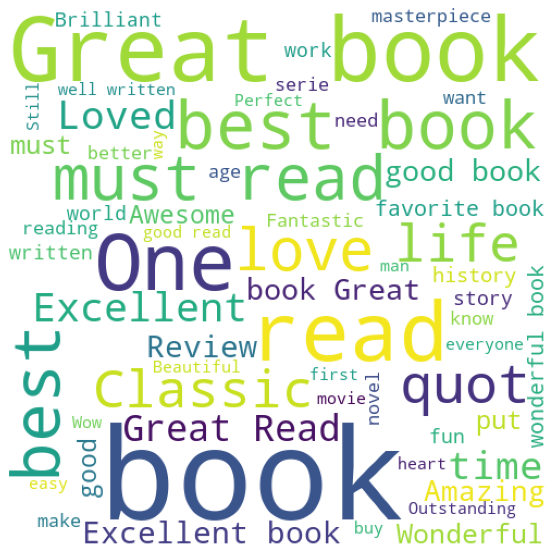

In [10]:
wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(pd_df[pd_df['review/score'] > 4]['review/summary'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

### How many books which users consider as a great book ? 

(Books with review score 5 and have 'Great' word in the summary)

In [37]:
good_books = pd_df.loc[(pd_df['review/score'] == 5) & (pd_df['review/summary'].str.contains('Great', regex=False)),['Title','review/score','review/summary']]
display(good_books)

,Title,review/score,review/summary
35,Whispers of the Wicked Saints,5.0,Great Read
69,Dramatica for Screenwriters,5.0,Armando is Great
77,Vector Quantization and Signal Compression (Th...,5.0,Great reference book for its topic
88,The Repeal of Reticence: A History of America'...,5.0,Great treatment of the defeat of reticence by ...
126,Eyewitness Travel Guide to Europe,5.0,Great book for travelling Europe
...,...,...,...
2999905,Galatians: The Charter of Christian Liberty,5.0,Great Purchase
2999954,Very Bad Deaths: Library Edition,5.0,"Bad Deaths, Great Book!"
2999970,My Life,5.0,Great Book!
2999984,Ghost Story,5.0,Great deal. thanks for the quick ship.


In [39]:
good_books['Title'].count()

111963